# **Modelo de Predicción**

Vamos a probar varios de los modelos de ensamble a ver cual funciona mejor para nuestro problema de regresión:

In [ ]:
%load_ext autoreload
%autoreload 2

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd


import sys

import warnings
warnings.filterwarnings('ignore')


sys.path.append("../")
from src import funciones_problemas_clasificacion as fpc

pd.set_option("display.max_columns", None)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
df = pd.read_pickle("../datos/dataframes/df_nonulls_encoded_outliers_scaled_balanced.pkl")
print(df.shape)
df.head()

(2060, 34)


,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,JobLevel,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Attrition
0,0.00000,-0.944950,1.000000,1.333333,0.000000,-1.0,-0.083333,-0.5,0.415932,-0.5,0.0,1.507414,-0.333333,-0.500000,-1.0,-0.944444,3.0,-0.666667,-0.5,-0.6,0.0,0.0,1.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.00000,0.000000,1.041064,-0.333333,0.108443,0.0,0.250000,-1.0,0.415932,-0.5,1.0,-0.131846,-0.666667,1.500000,0.0,-0.388889,0.0,0.000000,0.0,0.2,-1.0,1.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,0.94286,0.000000,5.255676,-0.250000,0.108443,0.0,0.833333,0.5,-6.615635,1.0,0.0,2.648120,-0.333333,0.166667,2.0,-0.500000,-1.0,0.000000,-0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,-0.05714,-0.944950,0.000000,0.250000,-0.069419,0.0,-0.416667,1.0,0.415932,0.5,0.0,0.626911,0.333333,-0.500000,2.0,0.388889,2.0,0.500000,3.0,0.4,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,-0.05714,1.238725,0.000000,-0.250000,0.000000,0.0,0.250000,-1.0,0.000000,-0.5,1.0,-0.471010,0.666667,-0.333333,1.0,-0.055556,-1.0,0.166667,-0.5,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [5]:
vr="Attrition"
modelo_clasificacion = fpc.AnalisisModelosClasificacion(df, vr)

Veamos las métricas para distintos modelos y las comparamos:

### **Logistic Regression**

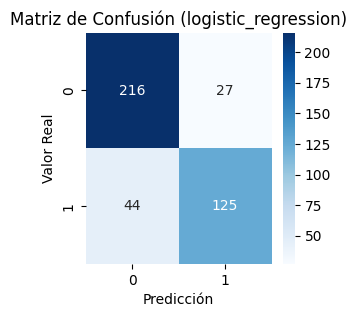

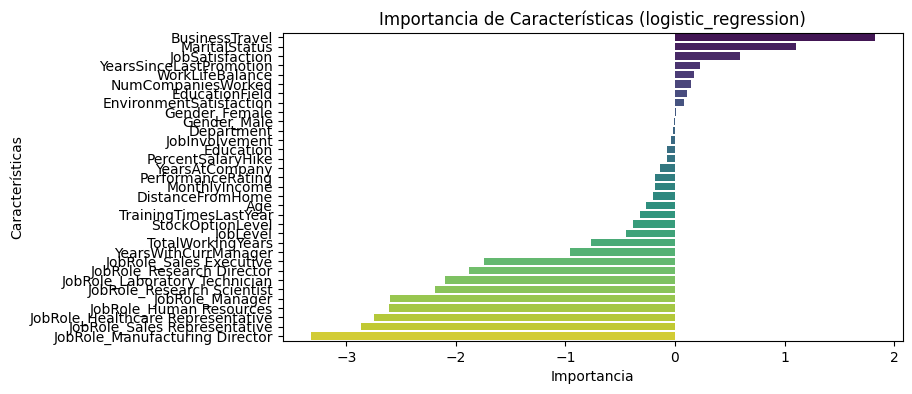

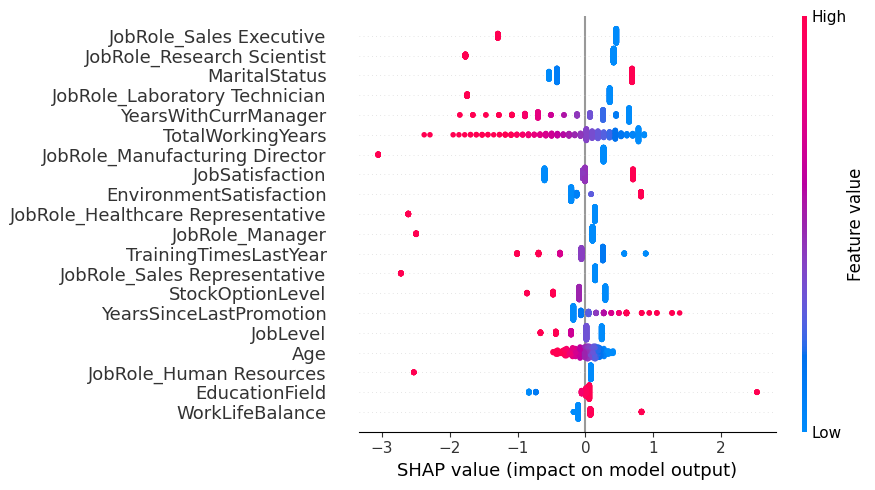

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.84284,0.842418,0.84284,0.841788,0.671948,0.910603,0.003001,NaN,NaN,NaN,regresion logistica
test,0.82767,0.827323,0.82767,0.826019,0.638311,0.886649,NaN,NaN,0.003001,NaN,regresion logistica


In [6]:
modelo_clasificacion.ajustar_modelo("logistic_regression")

modelo_clasificacion.plot_matriz_confusion("logistic_regression")
modelo_clasificacion.importancia_predictores(modelo_nombre ='logistic_regression')
modelo_clasificacion.plot_shap_summary(modelo_nombre="logistic_regression")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados = modelo_clasificacion.calcular_metricas(modelo_nombre =  "logistic_regression" )
df_resultados["modelo"] = "regresion logistica"
df_resultados

### **Decision Tree**

El mejor modelo es DecisionTreeClassifier(max_depth=10, min_samples_split=10)


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados
train,0.926578,0.927462,0.926578,0.926086,0.84674,0.977782,0.000988,16.0,NaN,NaN
test,0.822816,0.823802,0.822816,0.823186,0.63546,0.817067,NaN,NaN,0.000988,16.0


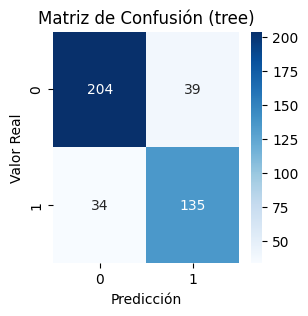

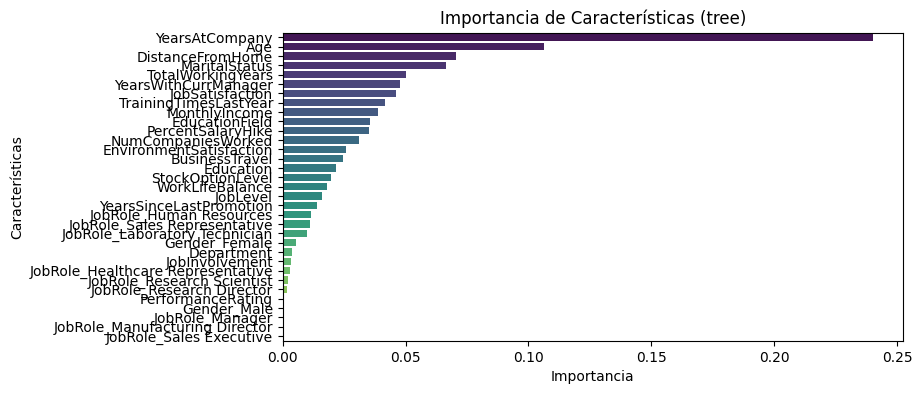

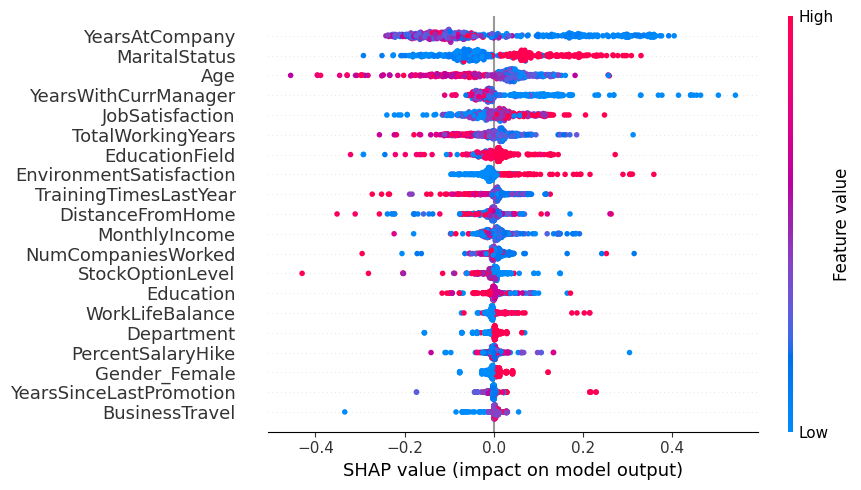

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.926578,0.927462,0.926578,0.926086,0.846740,0.977782,0.000988,16.0,NaN,NaN,decision tree
test,0.822816,0.823802,0.822816,0.823186,0.635460,0.817067,NaN,NaN,0.000988,16.0,decision tree
train,0.842840,0.842418,0.842840,0.841788,0.671948,0.910603,0.003001,NaN,NaN,NaN,regresion logistica
test,0.827670,0.827323,0.827670,0.826019,0.638311,0.886649,NaN,NaN,0.003001,NaN,regresion logistica


In [7]:
# llamamos a la función para ajustar el modelo
modelo_clasificacion.ajustar_modelo("tree")
df_resultados_tree = modelo_clasificacion.calcular_metricas(modelo_nombre =  "tree" )
display(df_resultados_tree)


modelo_clasificacion.plot_matriz_confusion("tree")
modelo_clasificacion.importancia_predictores(modelo_nombre ='tree')
modelo_clasificacion.plot_shap_summary(modelo_nombre="tree")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_tree["modelo"] = "decision tree"
df_resultados_final = pd.concat([df_resultados_tree, df_resultados], axis = 0)
df_resultados_final

# **Random Forest**

El mejor modelo es RandomForestClassifier(max_depth=20, n_estimators=200, n_jobs=-1)


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados
train,1.00000,1.000000,1.00000,1.00000,1.000000,1.000000,0.078378,-1.0,NaN,NaN
test,0.88835,0.891566,0.88835,0.88671,0.764155,0.942533,NaN,NaN,0.078378,-1.0


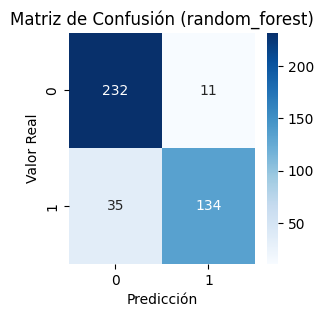

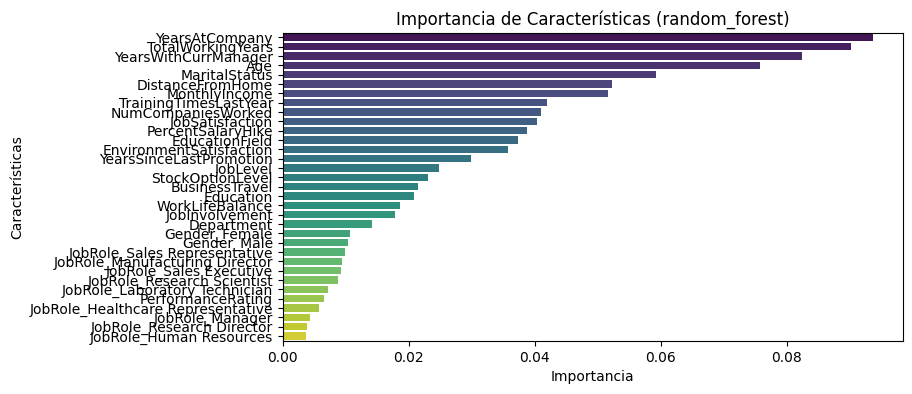

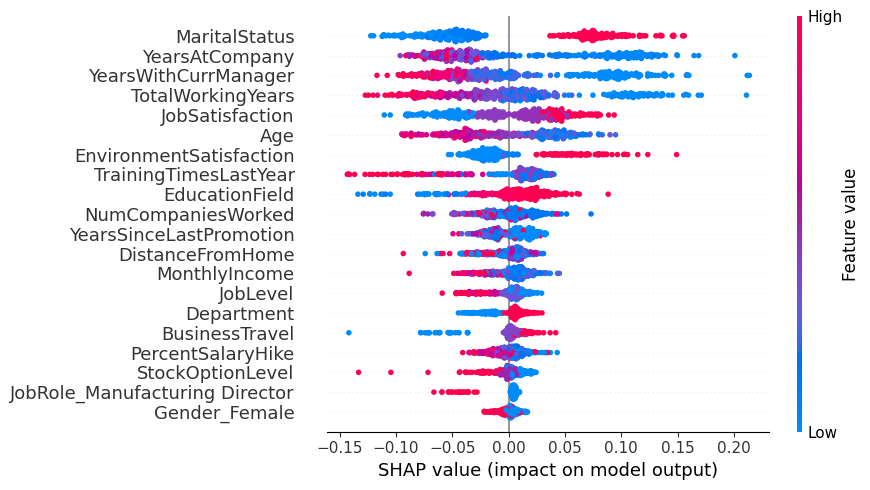

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.078378,-1.0,NaN,NaN,random forest
test,0.888350,0.891566,0.888350,0.886710,0.764155,0.942533,NaN,NaN,0.078378,-1.0,random forest
train,0.926578,0.927462,0.926578,0.926086,0.846740,0.977782,0.000988,16.0,NaN,NaN,decision tree
test,0.822816,0.823802,0.822816,0.823186,0.635460,0.817067,NaN,NaN,0.000988,16.0,decision tree
train,0.842840,0.842418,0.842840,0.841788,0.671948,0.910603,0.003001,NaN,NaN,NaN,regresion logistica
test,0.827670,0.827323,0.827670,0.826019,0.638311,0.886649,NaN,NaN,0.003001,NaN,regresion logistica


In [8]:
modelo_clasificacion.ajustar_modelo("random_forest")
df_resultados_random_forest = modelo_clasificacion.calcular_metricas(modelo_nombre = "random_forest")
display(df_resultados_random_forest)


modelo_clasificacion.plot_matriz_confusion("random_forest")
modelo_clasificacion.importancia_predictores(modelo_nombre ='random_forest')
modelo_clasificacion.plot_shap_summary(modelo_nombre="random_forest")


df_resultados_random_forest["modelo"] = "random forest"
df_resultados_final = pd.concat([df_resultados_random_forest, df_resultados_final], axis = 0)
df_resultados_final

### **XGBoost**

In [9]:
modelo_clasificacion.ajustar_modelo("xgboost")
df_resultados_xgboost = modelo_clasificacion.calcular_metricas(modelo_nombre = "xgboost")

df_resultados_xgboost["modelo"] = "xgboost"
df_resultados_final = pd.concat([df_resultados_xgboost, df_resultados_final], axis = 0)
df_resultados_final

El mejor modelo es XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.982403,0.982550,0.982403,0.982368,0.963545,0.999103,0.017001,NaN,NaN,NaN,xgboost
test,0.876214,0.876315,0.876214,0.875350,0.741142,0.928580,NaN,NaN,0.017001,NaN,xgboost
train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.078378,-1.0,NaN,NaN,random forest
test,0.888350,0.891566,0.888350,0.886710,0.764155,0.942533,NaN,NaN,0.078378,-1.0,random forest
train,0.926578,0.927462,0.926578,0.926086,0.846740,0.977782,0.000988,16.0,NaN,NaN,decision tree
test,0.822816,0.823802,0.822816,0.823186,0.635460,0.817067,NaN,NaN,0.000988,16.0,decision tree
train,0.842840,0.842418,0.842840,0.841788,0.671948,0.910603,0.003001,NaN,NaN,NaN,regresion logistica
test,0.827670,0.827323,0.827670,0.826019,0.638311,0.886649,NaN,NaN,0.003001,NaN,regresion logistica


Una vez hemos agrupado todas las métricas en un mismo df vamos a ponerlas distintos colores para verlas mejor y analizarlas.

### **Gradient Boosting**

In [10]:
modelo_clasificacion.ajustar_modelo("gradient_boosting")
df_resultados_gradient_boosting = modelo_clasificacion.calcular_metricas(modelo_nombre = "gradient_boosting")

df_resultados_gradient_boosting["modelo"] = "gradient boosting"
df_resultados_final = pd.concat([df_resultados_gradient_boosting, df_resultados_final], axis = 0)
df_resultados_final

El mejor modelo es GradientBoostingClassifier(learning_rate=0.2, max_depth=5, min_samples_leaf=4,
                           min_samples_split=10, n_estimators=200,
                           subsample=0.8)


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.041130,16.0,NaN,NaN,gradient boosting
test,0.888350,0.888508,0.888350,0.887640,0.766733,0.929018,NaN,NaN,0.041130,16.0,gradient boosting
train,0.982403,0.982550,0.982403,0.982368,0.963545,0.999103,0.017001,NaN,NaN,NaN,xgboost
test,0.876214,0.876315,0.876214,0.875350,0.741142,0.928580,NaN,NaN,0.017001,NaN,xgboost
train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.078378,-1.0,NaN,NaN,random forest
test,0.888350,0.891566,0.888350,0.886710,0.764155,0.942533,NaN,NaN,0.078378,-1.0,random forest
train,0.926578,0.927462,0.926578,0.926086,0.846740,0.977782,0.000988,16.0,NaN,NaN,decision tree
test,0.822816,0.823802,0.822816,0.823186,0.635460,0.817067,NaN,NaN,0.000988,16.0,decision tree
train,0.842840,0.842418,0.842840,0.841788,0.671948,0.910603,0.003001,NaN,NaN,NaN,regresion logistica
test,0.827670,0.827323,0.827670,0.826019,0.638311,0.886649,NaN,NaN,0.003001,NaN,regresion logistica


## **Resumen:**

In [11]:
df_resultados_colores = df_resultados_final.copy()
df_resultados_colores.drop(columns=['time_seconds',
       'n_jobs', 'tiempo_computacion(segundos)', 'nucleos_usados'], inplace=True)
df_resultados_colores.reset_index(inplace = True, drop = True)
df_resultados_colores = df_resultados_colores.style.apply(fpc.color_filas_con_borde, axis=1)

df_resultados_colores

,accuracy,precision,recall,f1,kappa,auc,modelo
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,gradient boosting
1,0.888350,0.888508,0.888350,0.887640,0.766733,0.929018,gradient boosting
2,0.982403,0.982550,0.982403,0.982368,0.963545,0.999103,xgboost
3,0.876214,0.876315,0.876214,0.875350,0.741142,0.928580,xgboost
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,random forest
5,0.888350,0.891566,0.888350,0.886710,0.764155,0.942533,random forest
6,0.926578,0.927462,0.926578,0.926086,0.846740,0.977782,decision tree
7,0.822816,0.823802,0.822816,0.823186,0.635460,0.817067,decision tree
8,0.842840,0.842418,0.842840,0.841788,0.671948,0.910603,regresion logistica
9,0.827670,0.827323,0.827670,0.826019,0.638311,0.886649,regresion logistica


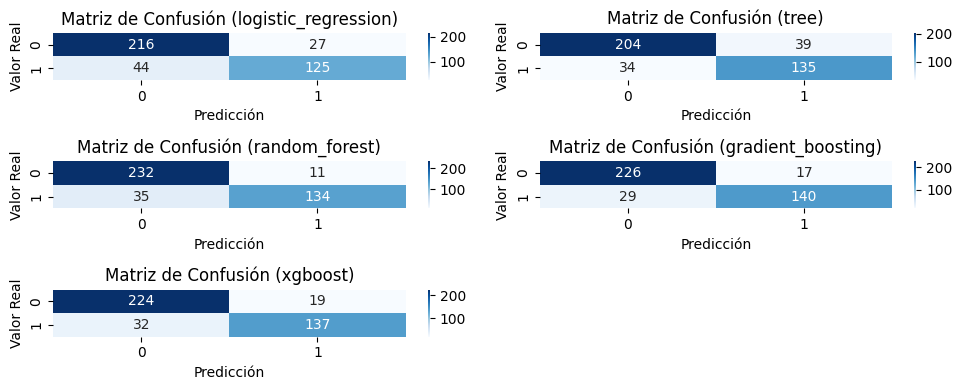

In [12]:
modelo_clasificacion.plot_all_matriz_confusion()

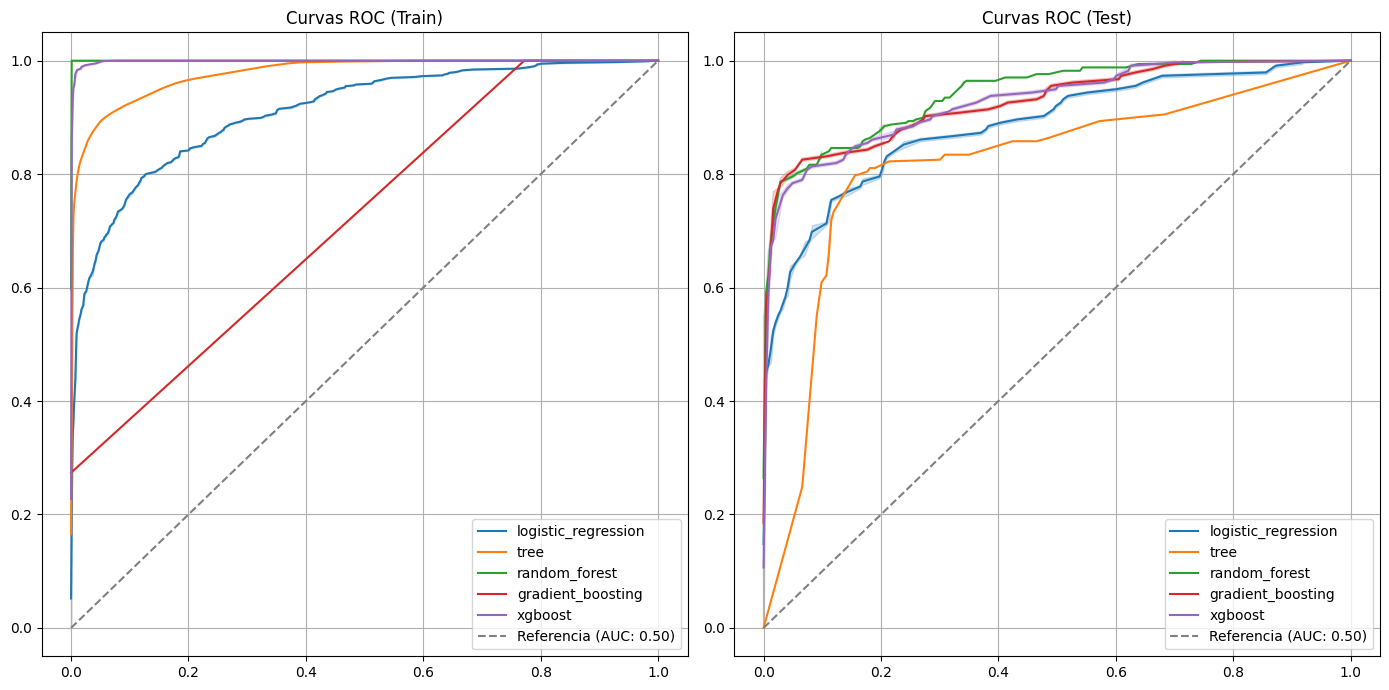

In [13]:
modelo_clasificacion.plot_curvas_roc_train_test()

Las métricas por lo general son mejores que las anterioires a excepción de gradient boosting que en el anterior modelo era mejor y en este ha empeorado.

### Reajuste de parámetros:

In [14]:
# XGBoost

params = {'n_estimators': [100, 200, 250, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_child_weight': [1, 3, 5, 6, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

modelo_clasificacion.ajustar_modelo("xgboost", param_grid=params)
df_resultados_xgboost = modelo_clasificacion.calcular_metricas(modelo_nombre = "xgboost")

df_resultados_xgboost["modelo"] = "xgboost"
df_resultados_xgboost

El mejor modelo es XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.031998,NaN,NaN,NaN,xgboost
test,0.885922,0.886514,0.885922,0.884981,0.761009,0.933475,NaN,NaN,0.031998,NaN,xgboost


Hemos conseguido mejorar ligeramente las métricas del XGBoost aumentando en una centésima todas ellas. Como este no ha sido un cambi significativamente grande vamos a probar con el random forest para ver si jugando con sus parámetros conseguimos una mejora mayor.

El mejor modelo es RandomForestClassifier(max_depth=15, n_estimators=200, n_jobs=-1)


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados
train,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.099365,-1.0,NaN,NaN
test,0.883495,0.88521,0.883495,0.882134,0.754804,0.937225,NaN,NaN,0.099365,-1.0


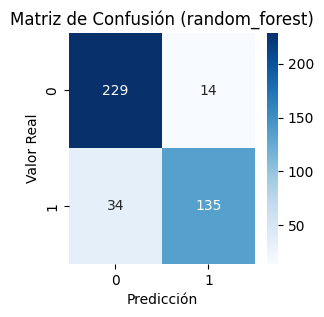

In [15]:
# random_forest

params = {'n_estimators': [100, 200, 250, 300],
        'max_depth': [5, 10, 15, 20, 25, 30],
        'min_samples_split': [2, 3, 5, 7, 10],
        'min_samples_leaf': [1, 2, 4, 5]
        }

modelo_clasificacion.ajustar_modelo("random_forest", param_grid=params)
df_resultados_random_forest = modelo_clasificacion.calcular_metricas(modelo_nombre = "random_forest")
display(df_resultados_random_forest)


modelo_clasificacion.plot_matriz_confusion("random_forest")

Seguimos teniendo mejores metricas para el XGBoost, por último vamos a intentarlo con el Gradient:

In [ ]:
# Gradiente Boosting
params_gradient={
                'n_estimators': [150, 200, 250, 300],
                'learning_rate': [0.1, 0.2, 0.25, 0.3],
                'max_depth': [4, 5, 7, 10],
                'min_samples_split': [2, 4, 5, 7, 10],
                'min_samples_leaf': [1, 2, 3, 4],
                'subsample': [0.8, 1.0]
            }

modelo_clasificacion.ajustar_modelo("gradient_boosting", param_grid=params_gradient)
df_resultados_gradient_boosting = modelo_clasificacion.calcular_metricas(modelo_nombre = "gradient_boosting")

df_resultados_gradient_boosting["modelo"] = "gradient boosting"
df_resultados_final = pd.concat([df_resultados_gradient_boosting, df_resultados_final], axis = 0)
df_resultados_final